# Análise e exploração de dados sobre um e-commerce
Análise sobre dados de marketing de um site de e-commerce. É necessário ser feita uma análise e exploração para entender os problemas e entregar soluções *Data-Driven*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import statistics as stt

In [2]:
base = pd.read_csv('./marketing_data.csv')
pd.set_option('display.max_columns', None)
base.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Agora vamos começar a analisar e garimpar os dados para uma limpeza e tratamento.

In [3]:
print('Shape: ', base.shape)
print('Colunas: ', [col for col in base.columns])

Shape:  (2240, 28)
Colunas:  ['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


In [4]:
base.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Antes de continuar, trocaremos o nome ' Income ' para 'income', pois está com espaços indesejados:

In [5]:
base.rename(mapper={' Income ': 'income'}, inplace=True, axis=1)

Veremos se nos valores categóricos terão dados unitários.

In [6]:
categorical = base.dtypes == 'object'
categories = list(categorical[categorical].index)
categories

['Education', 'Marital_Status', 'income', 'Dt_Customer', 'Country']

In [7]:
for cat in categories:
    print(f'Valores unitários em {cat}: ', base[cat].unique())

Valores unitários em Education:  ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Valores unitários em Marital_Status:  ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Valores unitários em income:  ['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']
Valores unitários em Dt_Customer:  ['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/13' '1/5/13'
 '11/21/12' '1

Podemos refletir que nem todos os valores categóricos são realmente categóricos. Teremos que arrumar isso antes de prosseguir.

Valores não categóricos que precisam ser transformados: \['income', 'Dt_Customer'\]

Vamos primeiro transformar os dados de Dt_Customer, sabemos que são Datas, podemos utilizar o [datetime.parser]:

In [8]:
base['Dt_Customer'].tail()

2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, dtype: object

In [9]:
from datetime import datetime

to_date = lambda date: datetime.strptime(date, '%m/%d/%y')

def adding_zero(date: str):
    split = date.split('/')
    split[0] = split[0].zfill(2) + '/'
    split[1] = split[1].zfill(2) + '/'
    split[2] = split[2].zfill(2)
    return ''.join(split)

temp_timer_base = base['Dt_Customer'].map(adding_zero)
temp_timer_base = temp_timer_base.map(to_date)
base['Dt_Customer'] = temp_timer_base

In [10]:
base['Dt_Customer'].head()

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]

Daremos uma olhada amistosa nos dados a partir das datas dos Costumers

In [11]:
# Vamos fazer uma cópia e indexar as rows a partir da data.
date_index = base.copy()
date_index.index = date_index['Dt_Customer']

# Aqui vemos os valores totais por ano e mês e depois só ano.
date_index.groupby([date_index.index.year, date_index.index.month]).count() #.agg({'count'})
date_index.groupby([date_index.index.year]).count() #.agg({'count'})

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012,494,494,494,494,490,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494
2013,1189,1189,1189,1189,1173,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189
2014,557,557,557,557,553,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557


Aproveitando que já estámos aqui, iremos plotar os dados de Costumers/Year, para saber a quantidade de clientes por ano.

Temos que a maioria dos costumers entraram em 2013.


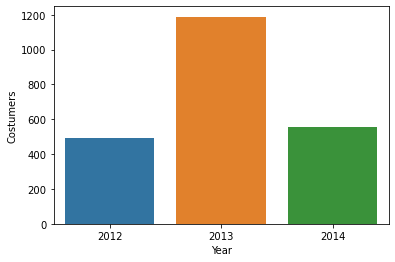

In [12]:
only_year = date_index.groupby(date_index.index.year).count()
x = only_year.index
y = only_year['ID']
srn.barplot(x, y)
plt.xlabel('Year')
plt.ylabel('Costumers')
print('Temos que a maioria dos costumers entraram em 2013.')

Vamos mexer agora em 'income', os valores são dolares, porém vendo os dtypes, temos que é um 'object', precisamos transformar em double

In [13]:
base.income.head()

0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name: income, dtype: object

In [14]:
# Trocaremos os valores de object para float, sabendo que estamos mexendo com dólar
base.income = base.income.replace('[\$,]', '', regex=True).astype(float)
base.income.head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: income, dtype: float64

Vamos mostrar novamente os dados categóricos para ver se estámos no caminho correto:

In [15]:
categorical = base.dtypes == 'object'
categories = list(categorical[categorical].index)
categories

['Education', 'Marital_Status', 'Country']

### Agora sim podemos focar nos reais dados categóricos.

Primeiro vamos ver os Estados Civis (Marital_Status)

In [16]:
# Temos 8 valores unique
base.Marital_Status.describe()

count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

In [17]:
# Pegaremos todos os valores unicos dessa serie
base.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [18]:
# YOLO não é bem um estado civil...
base.loc[base.Marital_Status == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
103,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0,CA
104,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,1,0,IND


In [19]:
# Sozinho talvez até seja, mas não
base.loc[base.Marital_Status == 'Alone']

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
286,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,0,CA
838,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,1,0,CA
959,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,0,CA


Tendo em vista desses itens absurdos, sendo eles YOLO e Absurd e Alone.
Vamos trocá-los para solteiros, já que nesse contexto podemos ver que YOLO: *"You only live once"* = "Só se vive uma vez" e Absurd = "Absurdo", pode ser visto mais como uma piada de pessoas solteiras (Ou desesperadas).

In [20]:
base.loc[
    (base.Marital_Status == 'Alone') |
    (base.Marital_Status == 'YOLO')  |
    (base.Marital_Status == 'Absurd')]

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
103,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0,CA
104,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,1,0,IND
286,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,0,CA
838,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,1,0,CA
959,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,0,CA
1068,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0,CA
1339,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,1,0,AUS


In [21]:
# Trocamos aqui todos os valores absurdos para Single
temp_single = base.loc[
    (base.Marital_Status == 'Alone') |
    (base.Marital_Status == 'YOLO')  |
    (base.Marital_Status == 'Absurd')] .copy()
temp_single.Marital_Status = 'Single'

base.loc[
    (base.Marital_Status == 'Alone') |
    (base.Marital_Status == 'YOLO')  |
    (base.Marital_Status == 'Absurd')] = temp_single

base.Marital_Status.value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

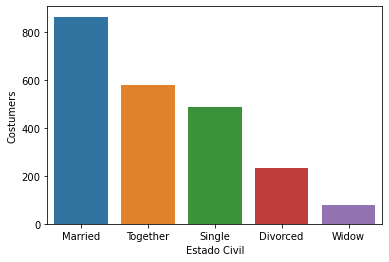

In [22]:
# Já que estamos aqui, vamos plotar quantidade por Estado civil
marital_plot = base.Marital_Status.value_counts()
srn.barplot(marital_plot.index, marital_plot.values)
plt.xlabel('Estado Civil')
plt.ylabel('Costumers')
plt.show()

Veremos se está tudo certo com os valores de 'Education'

In [23]:
base.Education.describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

In [24]:
base.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Parece que está tudo correto

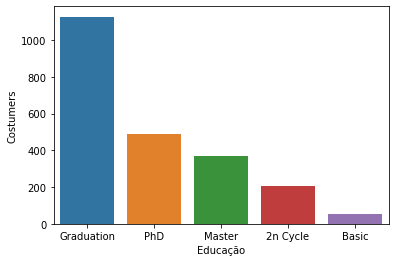

In [25]:
# Já que estamos aqui, vamos novamente também plotar os dados
education_plot = base.Education.value_counts()
srn.barplot(education_plot.index, education_plot.values)
plt.xlabel('Educação')
plt.ylabel('Costumers')
plt.show()

Agora veremos os dados de Country, última variável categórica

In [26]:
base.Country.describe()

count     2240
unique       8
top         SP
freq      1095
Name: Country, dtype: object

In [27]:
base.Country.value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

Ao que parece, temos os dados dos países distribuídos de forma válida

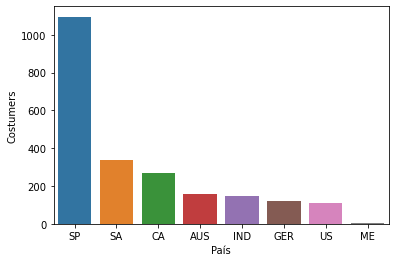

In [28]:
# Já que estamos aqui, vamos novamente também plotar os dados
country_plot = base.Country.value_counts()
srn.barplot(country_plot.index, country_plot.values)
plt.xlabel('País')
plt.ylabel('Costumers')
plt.show()

### Agora trocaremos os valores nulos

In [29]:
# Valores nulos
base.isnull().sum() # == base.isna().sum() # true

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Vemos que os valores nulos só aparecem em income.
Então, mostramos os valores nulos de 'income', veremos a melhor forma de tratar esse valores faltantes, tanto para apresentar, como para modelos de Machine Learning.

In [30]:
income_null_indexes = base.income.isnull()
base[income_null_indexes].head()

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA


Text(0.5, 0, 'Anual Income')

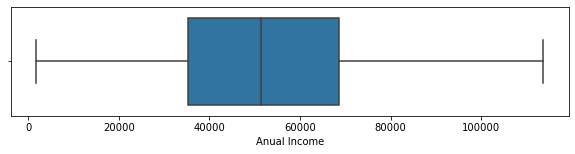

In [31]:
# Mas antes, vamos pltar para ter insights desses valores
fig = plt.subplots(figsize=(10, 2))
srn.boxplot(base.income, showfliers=False)
plt.xlabel('Anual Income')

In [32]:
base.income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

In [33]:
# Vamos usar a mediana para imputar os valores
mediana = base['income'].median()
mediana

51381.5

In [34]:
base.income.fillna(mediana, inplace=True)

In [35]:
base.income.isna().sum()

0

## Agora que finalizamos todo o tratamento, podemos começar uma ánalise em cima desses dados.

In [41]:
# Para relembrar
base.head()

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


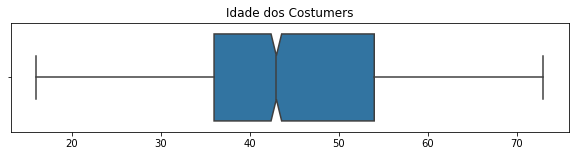

In [48]:
# Vamos ver a quantidade de clientes por idade no ano de Entrada.
test_year = base.copy()
test_year.years_old = test_year.Dt_Customer.dt.year - test_year.Year_Birth

plt.subplots(figsize=(10, 2))
ax = srn.boxplot(test_year.years_old.values, showfliers=False, notch=True)
ax.set_title('Idade dos Costumers')
plt.show()

### A partir daqui vamos seguir o que diz o tutorial sobre esse Dataset.

In [53]:
# Relacionar os que compraram Ouro, com os tipos de compra:
purchase_types = ['NumWebPurchases', 'NumCatalogPurchases',	'NumStorePurchases']
purchase_types.append('MntGoldProds')
base[purchase_types]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntGoldProds
0,4,4,6,218
1,7,3,7,37
2,3,2,5,30
3,1,0,2,0
4,3,1,2,34
...,...,...,...,...
2235,5,2,11,78
2236,1,0,3,16
2237,6,1,5,14
2238,5,4,10,63


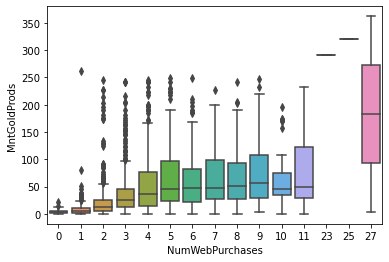

In [72]:
# Ver forma de relacionar esses dois.
srn.boxplot(base.NumWebPurchases, base.MntGoldProds)
plt.show()